In [2]:
import json

with open("SBHSData.json", "r") as read_file:
    data = json.load(read_file)
    #print(data)

## Step 1: Read the json file and print first few rows of data

In [2]:
import pandas as pd
from pandas.io.json import json_normalize
flatdata = json_normalize(data)
df = pd.DataFrame(flatdata)
df.head()

,area,hostname,uptime,version
0,storage,cYn9w2H75e,442,4.17.1f
1,storage,zw1jdc400P,442,4.17.1f
2,prod,rhbMtZPuBS,365,7.3(2)n1(1)
3,prod,LtGUVUT09j,365,7.3(2)n1(1)
4,storage,ibv6dmEoSp,22,4.14.5f


In [3]:
df.describe()

,area,hostname,uptime,version
count,3053,3053,3052,3052
unique,12,3053,673,54
top,storage,mTuBp1TBod,464,7.3(2)n1(1)
freq,1093,1,43,1078


## The data shows the server uptime across various areas. So lets look up the definition of 'Uptime'

# Uptime:

From Wikipedia, the free encyclopedia

<h3> Uptime is often used as a measure of computer operating system reliability or stability, in that this time represents the time a computer can be left unattended without crashing, or needing to be rebooted for administrative or maintenance purposes. <br> <br>

Conversely, long uptime may indicate negligence, because some critical updates can require reboots on some platforms. </h3>

In [22]:
df['uptime'] = pd.to_numeric(df['uptime'])
#df[df['area']=='storage']['uptime'].describe()
df['uptime'].describe()

count    3022.000000
mean      602.034414
std       522.903367
min         1.000000
25%       227.500000
50%       471.000000
75%       902.000000
max      2599.000000
Name: uptime, dtype: float64

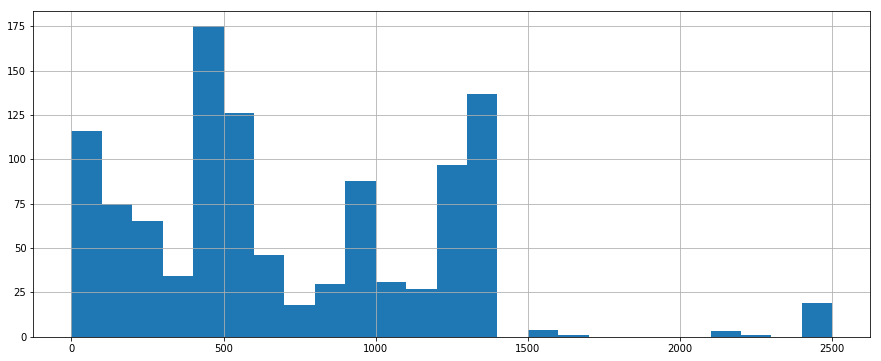

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
bin_values = np.arange(start=0, stop=2600, step=100)
df[df['area']=='storage']['uptime'].hist(bins=bin_values, figsize=[15,6])
#df['uptime'].hist(bins=bin_values, figsize=[10,6])

# Uptime Stats:
    
<b>Total Records </b> :   3022 <br>
<b> Mean Uptime </b>  :    602.03 <br>
<b> Standard Deviation        </b>  :522.9 <br>
<b> Minimum Server Uptime         </b>  :1 <br>
<b> 25 Percentile Uptime       </b>  : 227.5 <br>
<b> 50 Percentile Uptime       </b>  : 471 <br>
<b> 75 Percentile Uptime       </b>  :  902 <br>
<b> Maximum Server Uptime      </b>  : 2599 <br>

## Box plot grouped by Area

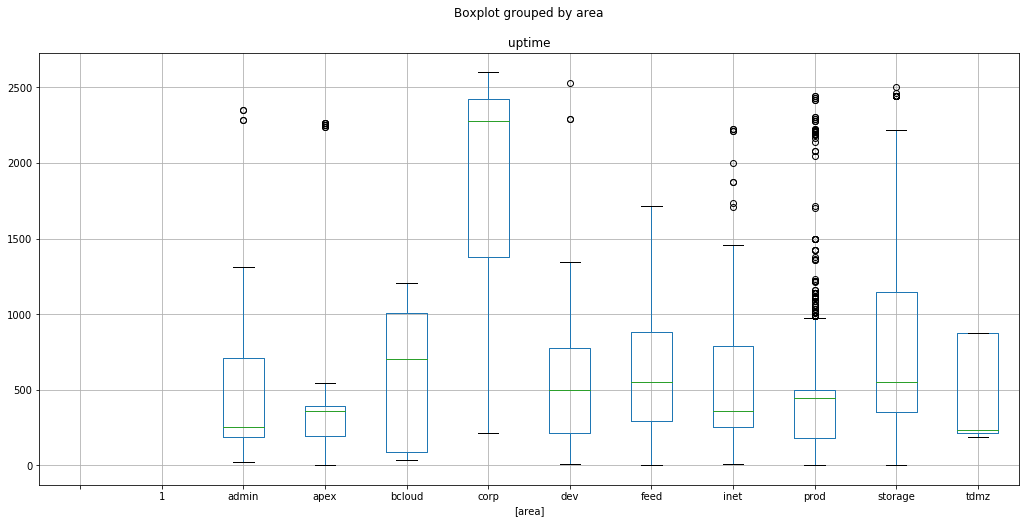

In [132]:
#df['uptime'].plot.box(by=df['area'], figsize=[6,10])
df.boxplot(by='area',figsize=[17,8])

## Corp seems to have higher uptime than most areas. Whereas apex and prod seems to have the lower uptimes.

In [127]:
df[df["area"]=='corp']["uptime"].describe()

count      62.000000
mean     1858.612903
std       788.518893
min       211.000000
25%      1377.000000
50%      2276.000000
75%      2423.000000
max      2599.000000
Name: uptime, dtype: float64

## Next we will look at Uptime by Version

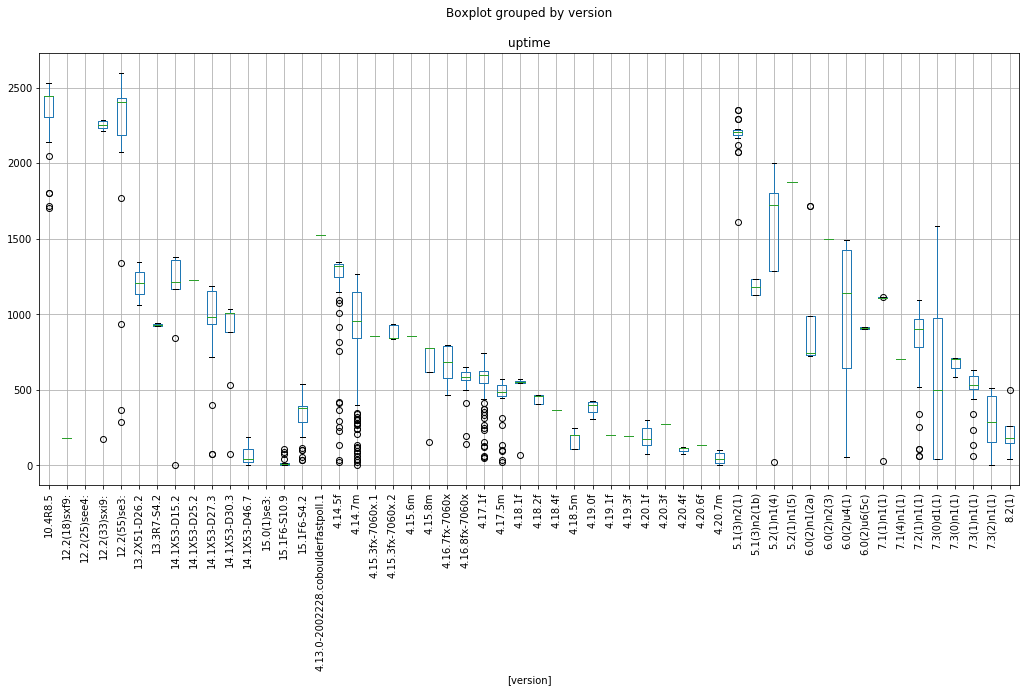

In [6]:
df.boxplot(by='version',figsize=[17,8],rot=90)

##  # of Hostnames per area


storage    1093
prod       1080
admin       190
dev         180
inet        144
bcloud      133
feed         74
apex         72
corp         64
1            12
tdmz         10
              1
Name: area, dtype: int64

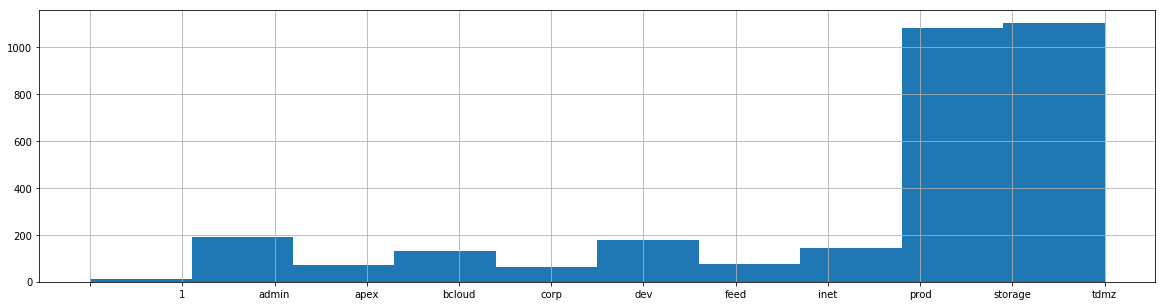

In [131]:
df['area'].hist(figsize=[20,5])
df['area'].value_counts()

In [10]:
def calc_status (row):
    if row['uptime'] > 602 + 522 :
        return 'Neglected'
    if row['uptime'] < 602 - 522 :
        return 'Buggy'
    return 'Normal'

df['status'] = df.apply (lambda row: calc_status (row),axis=1)
df.head()

,area,hostname,uptime,version,status
0,storage,cYn9w2H75e,442.0,4.17.1f,Normal
1,storage,zw1jdc400P,442.0,4.17.1f,Normal
2,prod,rhbMtZPuBS,365.0,7.3(2)n1(1),Normal
3,prod,LtGUVUT09j,365.0,7.3(2)n1(1),Normal
4,storage,ibv6dmEoSp,22.0,4.14.5f,Buggy


status   Buggy  Neglected  Normal
area                             
           NaN        NaN     1.0
1          NaN        NaN    24.0
admin     14.0       18.0   348.0
apex      18.0       20.0   106.0
bcloud    52.0       42.0   172.0
corp       NaN       98.0    30.0
dev       58.0       32.0   270.0
feed      14.0       12.0   122.0
inet      26.0       34.0   228.0
prod     202.0      138.0  1820.0
storage  190.0      554.0  1442.0
tdmz       NaN        NaN    20.0


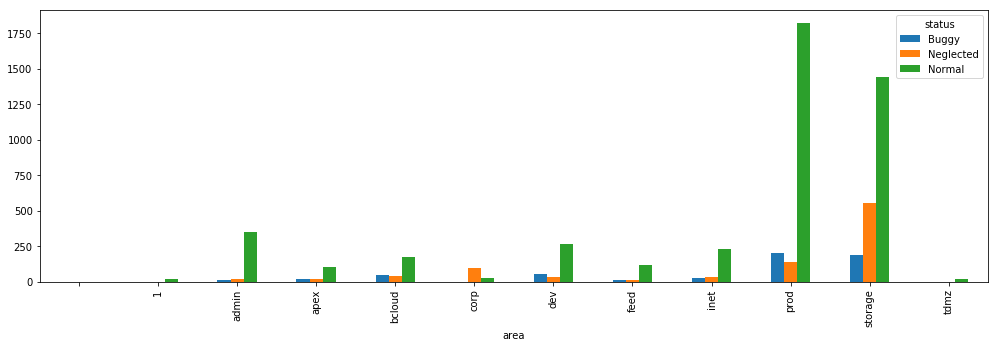

In [58]:
table = pd.pivot_table(df, index=["area"], columns=["status"], values=[], aggfunc=np.count_nonzero)
print(table)
table.plot(by='area',figsize=[17,5],kind="bar")

In [12]:
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
# define example
data = [1, 3, 2, 0, 3, 2, 2, 1, 0, 1]
data = array(data)
print(data)
# one hot encode
encoded = to_categorical(data)
print(encoded)
# invert encoding
inverted = argmax(encoded[0])
print(inverted)


ModuleNotFoundError: No module named 'keras'